In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df_pl = pd.read_csv('data/vacation/vacation_poland.csv')
df_usa = pd.read_csv('data/vacation/vacation_usa.csv')
df_gb = pd.read_csv('data/vacation/vacation_britain.csv')

In [13]:
df_pl.head()

,Miesiąc,vacation: (Polska)
0,2004-01,0
1,2004-02,87
2,2004-03,93
3,2004-04,100
4,2004-05,63


In [14]:
# merge dataframes on column 'Miesiąc'
df = pd.merge(df_pl, df_usa, on='Miesiąc')
df = pd.merge(df, df_gb, on='Miesiąc')

In [15]:
df.head()

,Miesiąc,vacation: (Polska),vacation: (Stany Zjednoczone),vacation: (Wielka Brytania)
0,2004-01,0,98,40
1,2004-02,87,86,36
2,2004-03,93,82,44
3,2004-04,100,77,36
4,2004-05,63,81,38


In [16]:
df.columns = ['month', 'pl', 'usa', 'gb']
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
df.set_index('month', inplace=True)

In [17]:
df.head()

,pl,usa,gb
month,,,
2004-01-01,0,98,40
2004-02-01,87,86,36
2004-03-01,93,82,44
2004-04-01,100,77,36
2004-05-01,63,81,38


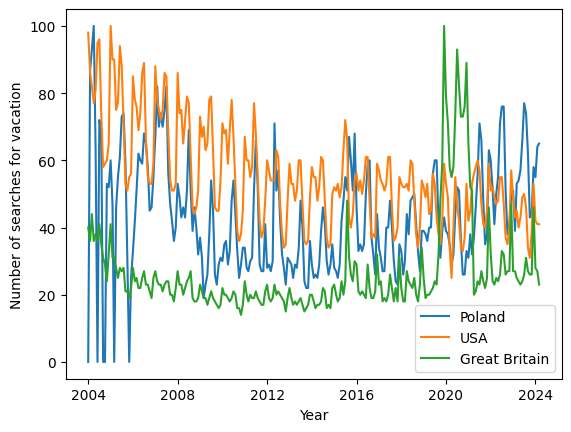

In [18]:
plt.plot(df.index , df['pl'], label='Poland')
plt.plot(df.index, df['usa'], label='USA')
plt.plot(df.index, df['gb'], label='Great Britain')
plt.xlabel('Year')
plt.ylabel('Number of searches for vacation')
plt.legend()
plt.show()

In [19]:
df.describe()

,pl,usa,gb
count,243.000000,243.000000,243.000000
mean,43.053498,55.609053,26.641975
std,16.886141,14.889658,14.145912
min,0.000000,25.000000,14.000000
25%,30.500000,45.000000,19.000000
50%,40.000000,53.000000,22.000000
75%,53.500000,62.000000,27.000000
max,100.000000,100.000000,100.000000


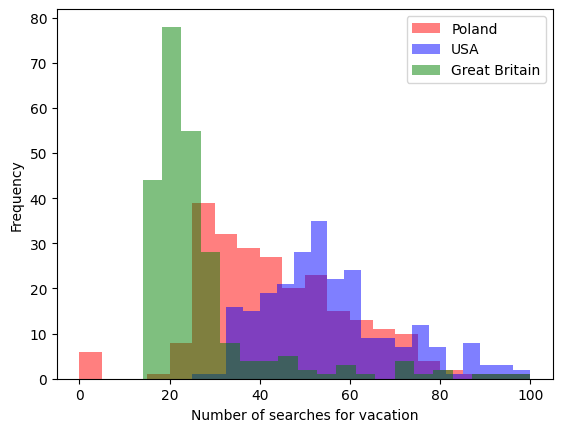

In [20]:
plt.hist(df['pl'], bins=20, alpha=0.5, label='Poland', color='r')
plt.hist(df['usa'], bins=20, alpha=0.5, label='USA', color='b')
plt.hist(df['gb'], bins=20, alpha=0.5, label='Great Britain', color='g')
plt.xlabel('Number of searches for vacation')
plt.ylabel('Frequency')
plt.legend()
plt.show()

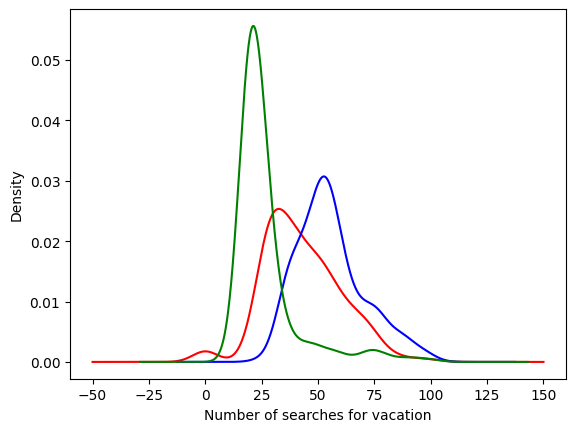

In [21]:
# show kernel density estimation for each country in one plot
df['pl'].plot.kde(color='r')
df['usa'].plot.kde(color='b')
df['gb'].plot.kde(color='g')
plt.xlabel('Number of searches for vacation')
plt.ylabel('Density')
plt.show()